**Importing the required libraries**

In [1]:
#installing required libraries
!pip install pycaret
!pip install scikit-learn
!pip install seaborn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''        
import seaborn as sns
sns.set_palette('bright')
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import pycaret
from pycaret import classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

**Read data**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd '/content/gdrive/My Drive/Movella/'

/content/gdrive/My Drive/Movella


In [5]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

---------------------------------------------------------------

There are 26 columns in the data (the description of which is shown below, copied from the kaggle - https://www.kaggle.com/osmi/mental-health-in-tech-survey dataset information)

- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

- physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

- mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

----------------------------------------------

We can see that the data comprises of various kinds of data like: 
- Demographic data
- Geographic data
- Details about tech workplace
- Benefits and support from employer
- Consequences

Considering all these kinds of data, we can consider the '**treatment**' variable to be our '**Target**' variable (which identifies if a person has sought treatment for his/her mental health) and find the best model to predict if and how all the above **features** (the remaining columns, which will be modified/dropped depending on their importance in the next steps) affect a person's interest to get treatment. 

**Understanding the data** & **Data Cleaning**

In [7]:
print("Number of rows: ",df.shape[0],"\nNumber of columns: ",df.shape[1])

Number of rows:  1259 
Number of columns:  27


In [8]:
#let's see the number of null values for each column
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
benefits                        0
Age                             0
Gender                          0
Country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
care_options                    0
obs_consequence                 0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
Timestamp                       0
dtype: int64

The highest number of NA values are in the comments column (1095 rows)

In [9]:
df[-df['comments'].isnull()]['comments']

13      I'm not on my company's health insurance which...
15      I have chronic low-level neurological issues t...
16      My company does provide healthcare but not to ...
24                    Relatively new job. Ask again later
25      Sometimes I think  about using drugs for my me...
33      I selected my current employer based on its po...
45      Our health plan has covered my psychotherapy a...
49      I just started a new job last week hence a lot...
59      In addition to my own mental health issues I'v...
66                        Thanks for doing this research.
93      In Russia we have mandatory medical insurance....
100     In my previous workplace which had mental heal...
106     I've seen negative consequences towards mental...
141     I'm not a permanent employee so do not get the...
144     I'd be more worried about coworkers and workpl...
158     Had a co-worker disappear from work for a few ...
159     Family history of depression.  Currently deali...
160     I feel

We can try to analyze the comments column (as the people have written some important things) using NLP, but as almost 87% of the entries does not have a comment, it would be difficult to incorporate the analysis of this column to our model, so we will drop this column in the coming steps

In [10]:
#Let's check the state column (as it has 515 NA values)
df.state.value_counts()

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
PA     29
OR     29
IL     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
NJ      6
OK      6
KY      5
SC      5
CT      4
IA      4
DC      4
SD      3
NH      3
KS      3
NV      3
VT      3
NE      2
WY      2
NM      2
ID      1
WV      1
RI      1
LA      1
MS      1
ME      1
Name: state, dtype: int64

In [11]:
#As the state column is not NULL only for the US, let's make a new df with only US entries
#df.Country.value_counts() - as the US has the highest number of entries, we can analyze US data separately if reqd
dfUS = df[df.Country == 'United States']
dfUS.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN


In [12]:
#Let's have a look at the columns
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [13]:
#Let's convert the timestamp to datetime format for easier manipulation
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
type(df.Timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df.Timestamp.dt.year.value_counts()

2014    1190
2015      68
2016       1
Name: Timestamp, dtype: int64

As we can see that the data has been recorded from August 2014 to Feb 2016 (a period of around 18months) and almost 95% of the data is from 2014, we can safely ignore the timestamp column

We can drop the following columns from the dataframe which are not required for our models: Timestamp, state(if we need state-wise analysis, we could do that from the dfUS dataframe we created), comments

In [15]:
df = df.drop(['Timestamp','state','comments'], axis=1)
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [16]:
#Let's check the null values remaining
df.isnull().sum().sort_values(ascending=False)

work_interfere               264
self_employed                 18
obs_consequence                0
mental_vs_physical             0
Gender                         0
Country                        0
family_history                 0
treatment                      0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
Age                            0
dtype: int64

Let's go through all the columns, checking and understanding the data - column by column

In [17]:
df.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

We can see tha the minimum value for age in the data is -1726 and the maximum is 1e+11 - which are not practical
So, let's see the value counts

In [18]:
df.Age.value_counts().sort_values()

-1               1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 11              1
 61              1
 58              1
 329             1
-29              1
 65              1
 62              1
 72              1
 60              2
 47              2
 55              3
 57              3
 54              3
 49              4
 56              4
 51              5
 50              6
 48              6
 20              6
 18              7
 19              9
 44             11
 46             12
 45             12
 21             16
 42             20
 22             21
 41             21
 43             28
 40             33
 39             33
 36             37
 38             39
 37             43
 24             46
 23             51
 35             55
 25             61
 30             63
 34             65
 31             67
 28             68
 33             70
 27             71
 26             75
 32             82
 29         

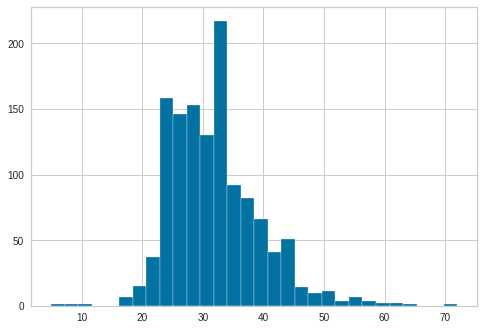

In [19]:
# As a negative age is not possible, let's remove the rows with negative age 
# And as the oldest person ever, was 122 years old, let's take 123 as the upper limit
df = df[(df.Age > 0) & (df.Age < 123)]
df.Age.hist(bins=30)

In [20]:
#Gender column
#df.Gender.value_counts()
list(set(df.Gender.values))

['A little about you',
 'Cis Female',
 'cis-female/femme',
 'Male-ish',
 'Woman',
 'queer/she/they',
 'Female',
 'Genderqueer',
 'queer',
 'male',
 'maile',
 'Female ',
 'Agender',
 'Male',
 'Male (CIS)',
 'Trans-female',
 'm',
 'ostensibly male, unsure what that really means',
 'Malr',
 'Femake',
 'Mal',
 'something kinda male?',
 'M',
 'Androgyne',
 'Mail',
 'F',
 'Cis Male',
 'male leaning androgynous',
 'Neuter',
 'female',
 'Trans woman',
 'femail',
 'Male ',
 'fluid',
 'Enby',
 'non-binary',
 'Cis Man',
 'Guy (-ish) ^_^',
 'Female (cis)',
 'woman',
 'msle',
 'Female (trans)',
 'cis male',
 'Make',
 'Man',
 'f',
 'Nah']

Let's group all these values into 3 groups - Male, Female, Other

In [21]:
male = [ 'Mal', 'Male (CIS)', 'Cis Man', 'Male-ish', 'Male ', 'maile', 'something kinda male?', 'Malr', 'male', 'msle', 'M', 'm', 'cis male', 'Male','Make', 'Man', 'Mail', 'Cis Male']
female = [ 'Woman', 'f', 'woman', 'F', 'Cis Female', 'femail', 'Female ', 'Femake', 'Female (cis)', 'Female', 'female', 'cis-female/femme']
other = ['Trans woman', 'queer/she/they', 'Nah', 'non-binary', 'male leaning androgynous', 'queer', 'A little about you', 'ostensibly male, unsure what that really means', 'Androgyne', 'Neuter', 'Enby', 'Genderqueer', 'fluid', 'Guy (-ish) ^_^', 'Agender', 'Female (trans)', 'Trans-female']


In [22]:
df = df.replace(male, 'Male')
df = df.replace(female, 'Female')
df = df.replace(other, 'Other')
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [23]:
df.Gender.value_counts()

Male      989
Female    247
Other      18
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender distribution')

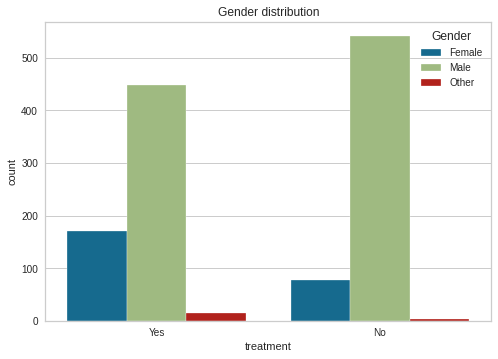

In [24]:
sns.countplot(x= 'treatment', data = df, hue = 'Gender').set_title('Gender distribution')

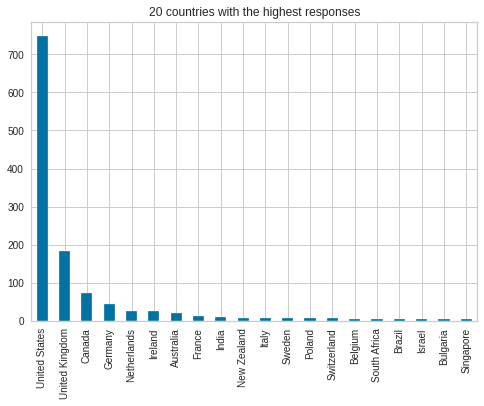

In [25]:
#Country column
df.Country.value_counts().sort_values(ascending=False)[:20].plot(kind='bar',title='20 countries with the highest responses')

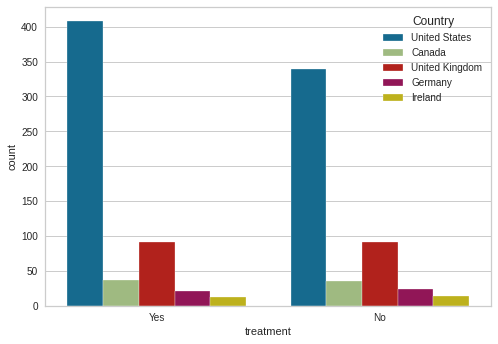

In [26]:
df1 = df[(df.Country == 'United States') | (df.Country == 'United Kingdom') | (df.Country == 'Canada') | (df.Country == 'Germany') | (df.Country == 'Ireland')]
sns.countplot(x= 'treatment', data = df1, hue = 'Country')

No     1092
Yes     144
Name: self_employed, dtype: int64


Text(0.5, 1.0, 'Distribution of if self_employed column')

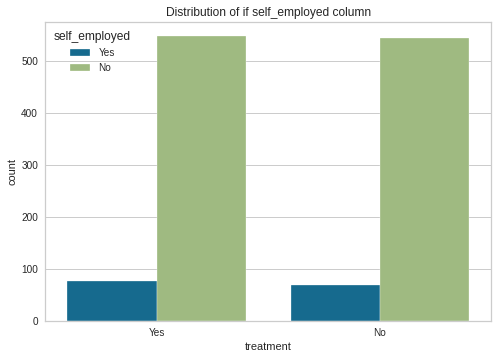

In [27]:
#self-employed column
print(df.self_employed.value_counts())
sns.countplot(x= 'treatment', data = df, hue = 'self_employed').set_title('Distribution of if self_employed column')

In [28]:
df.self_employed.isnull().sum()

18

No     764
Yes    490
Name: family_history, dtype: int64


Text(0.5, 1.0, 'Distribution of Yes/No options of family history')

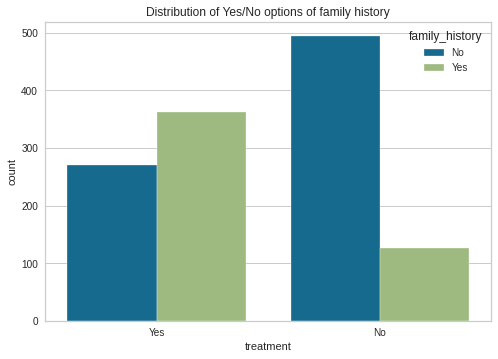

In [29]:
#family_history column
print(df.family_history.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.family_history).set_title('Distribution of Yes/No options of family history')

Yes    633
No     621
Name: treatment, dtype: int64


Text(0.5, 1.0, 'Target variable distribution')

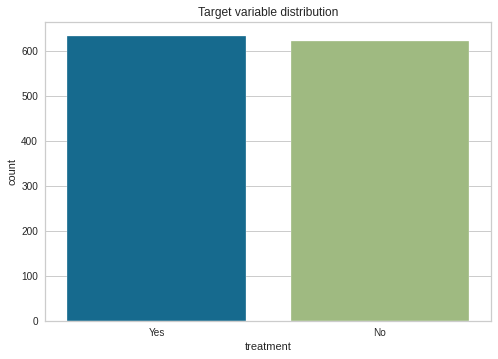

In [30]:
print(df.treatment.value_counts())
sns.countplot(df.treatment).set_title('Target variable distribution')

As **treatment** is our target variable, and it can belong to two classes (Yes or No), this first thing we would have to check is if the target is balanced. We can see that both the classes are almost equal and balanced (so we would not need to balance the dataset). 

Sometimes    464
Never        213
Rarely       173
Often        141
Name: work_interfere, dtype: int64


Text(0.5, 1.0, 'Does your mental health interfere with work')

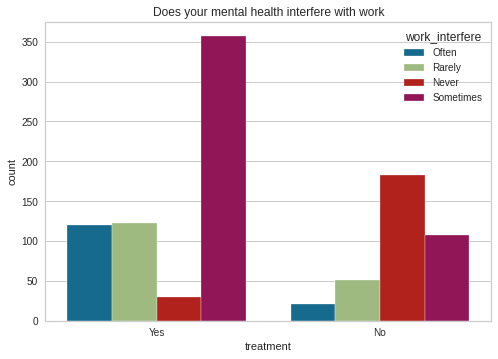

In [31]:
#work_interfere column
print(df.work_interfere.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.work_interfere).set_title('Does your mental health interfere with work')

6-25              289
26-100            288
More than 1000    281
100-500           176
1-5               160
500-1000           60
Name: no_employees, dtype: int64


Text(0.5, 1.0, 'Employee distribution')

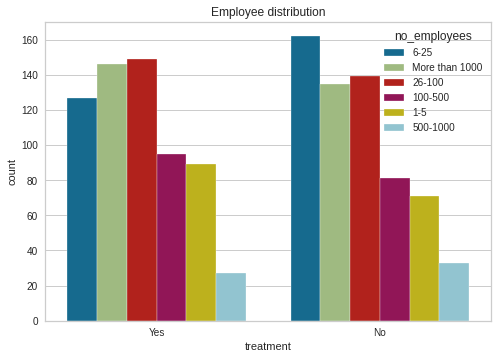

In [32]:
#Number of employees
print(df.no_employees.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.no_employees).set_title('Employee distribution')

No     881
Yes    373
Name: remote_work, dtype: int64


Text(0.5, 1.0, 'Does the person work remotely')

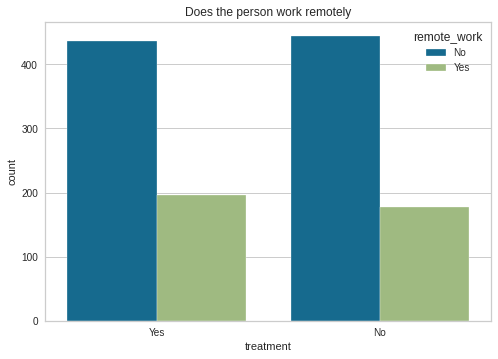

In [33]:
#Remote work
print(df.remote_work.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.remote_work).set_title('Does the person work remotely')

Yes    1028
No      226
Name: tech_company, dtype: int64


Text(0.5, 1.0, 'Tech company or not')

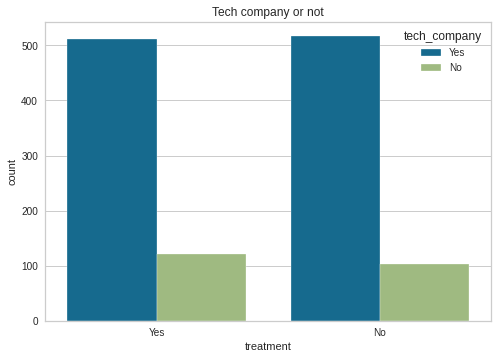

In [34]:
#Tech company or not
print(df.tech_company.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.tech_company).set_title('Tech company or not')

Yes           474
Don't know    408
No            372
Name: benefits, dtype: int64


Text(0.5, 1.0, 'Does the company provide benefits')

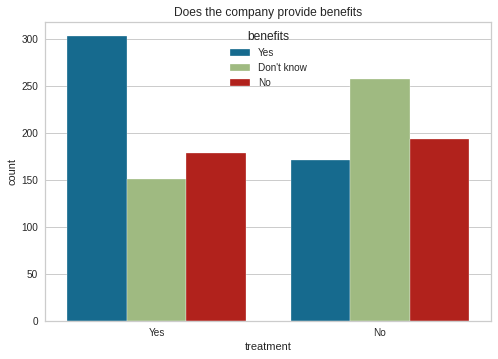

In [35]:
#Benefits
print(df.benefits.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.benefits).set_title('Does the company provide benefits')

No          499
Yes         441
Not sure    314
Name: care_options, dtype: int64


Text(0.5, 1.0, 'Knowledge of the options provided for mental health')

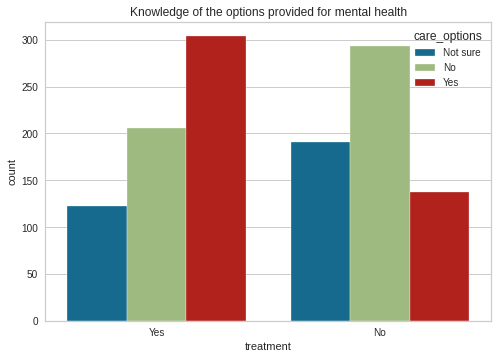

In [36]:
#employee's knowledge of the options for mental health provided
print(df.care_options.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.care_options).set_title('Knowledge of the options provided for mental health')

No            839
Yes           228
Don't know    187
Name: wellness_program, dtype: int64


Text(0.5, 1.0, 'Wellness program')

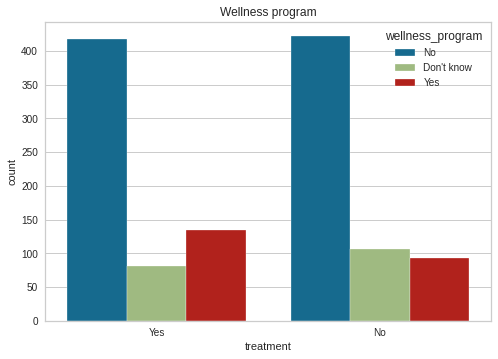

In [37]:
#Wellness program
print(df.wellness_program.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.wellness_program).set_title('Wellness program')

No            643
Don't know    363
Yes           248
Name: seek_help, dtype: int64


Text(0.5, 1.0, 'Does employer provide resources')

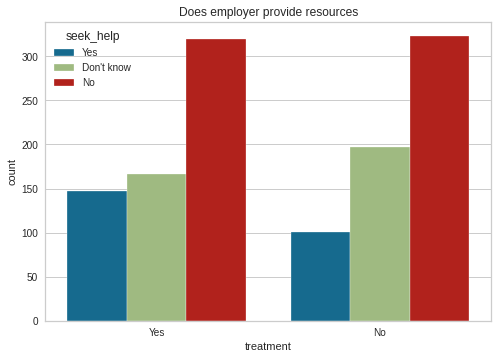

In [38]:
#Employer provide resources?
print(df.seek_help.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.seek_help).set_title('Does employer provide resources')

Don't know    816
Yes           374
No             64
Name: anonymity, dtype: int64


Text(0.5, 1.0, 'Anonymity protected?')

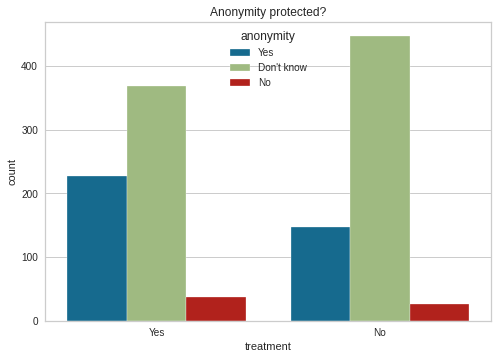

In [39]:
#Anonymity
print(df.anonymity.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.anonymity).set_title('Anonymity protected?')

Don't know            561
Somewhat easy         266
Very easy             205
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64


Text(0.5, 1.0, 'Medical Leave')

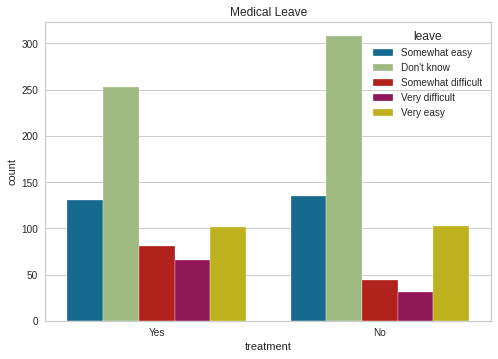

In [40]:
#Medical leave
print(df.leave.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.leave).set_title('Medical Leave')

No       489
Maybe    476
Yes      289
Name: mental_health_consequence, dtype: int64


Text(0.5, 1.0, 'Mental Health Consequence?')

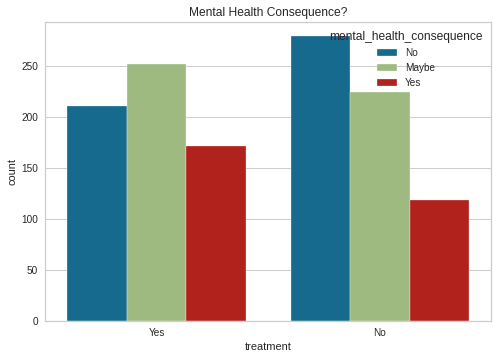

In [41]:
#Mental health consequence
df.mental_health_consequence
print(df.mental_health_consequence.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.mental_health_consequence).set_title('Mental Health Consequence?')

No       922
Maybe    273
Yes       59
Name: phys_health_consequence, dtype: int64


Text(0.5, 1.0, 'Physical health consequence')

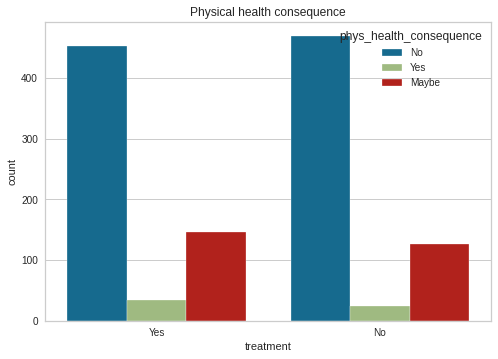

In [42]:
#Physical health consquence
print(df.phys_health_consequence.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.phys_health_consequence).set_title('Physical health consequence')

Some of them    772
No              258
Yes             224
Name: coworkers, dtype: int64


Text(0.5, 1.0, 'Discuss your issues with coworkers?')

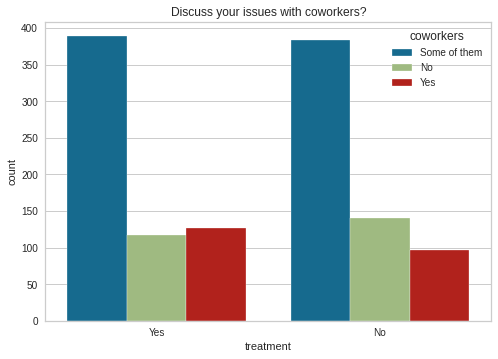

In [43]:
#Discuss with coworkers
print(df.coworkers.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.coworkers).set_title('Discuss your issues with coworkers?')

Yes             514
No              390
Some of them    350
Name: supervisor, dtype: int64


Text(0.5, 1.0, 'Discuss your issues with Supervisor')

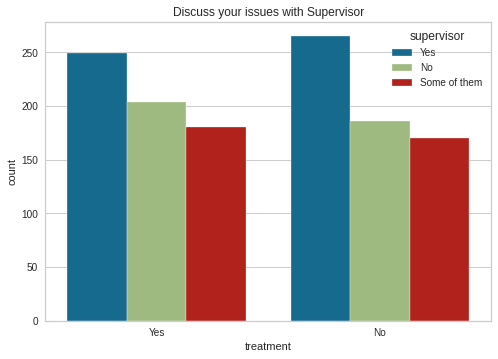

In [44]:
#Discuss with supervisor
print(df.supervisor.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.supervisor).set_title('Discuss your issues with Supervisor')

No       1005
Maybe     207
Yes        42
Name: mental_health_interview, dtype: int64


Text(0.5, 1.0, 'Mental health in an interview')

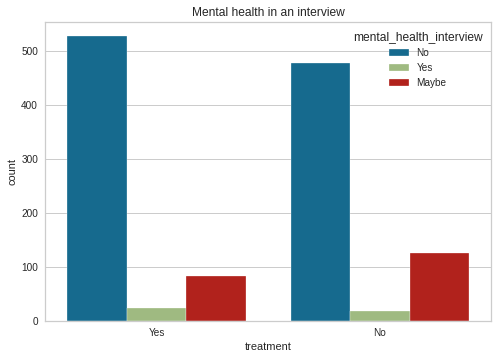

In [45]:
#Bring up Mental health in an interview?
print(df.mental_health_interview.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.mental_health_interview).set_title('Mental health in an interview')

Maybe    556
No       497
Yes      201
Name: phys_health_interview, dtype: int64


Text(0.5, 1.0, 'Physical health in an interview')

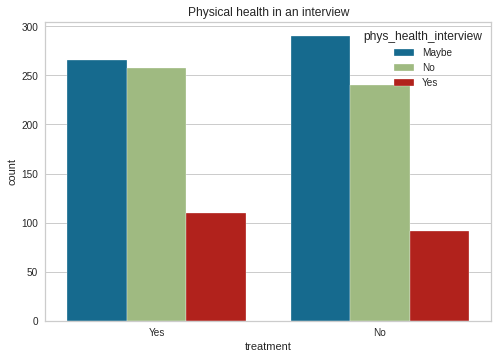

In [46]:
#Bring up Physical health in an interview
print(df.phys_health_interview.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.phys_health_interview).set_title('Physical health in an interview')

Don't know    574
Yes           342
No            338
Name: mental_vs_physical, dtype: int64


Text(0.5, 1.0, 'Does employer take Mental and physical issues equal')

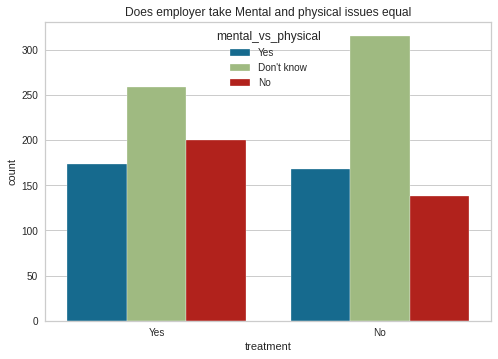

In [47]:
#Mental health vs physical health - employers view
print(df.mental_vs_physical.value_counts())
sns.countplot(x= 'treatment', data = df, hue = df.mental_vs_physical).set_title('Does employer take Mental and physical issues equal')

No     1072
Yes     182
Name: obs_consequence, dtype: int64


Text(0.5, 1.0, 'Observed any negative consequences in workplace')

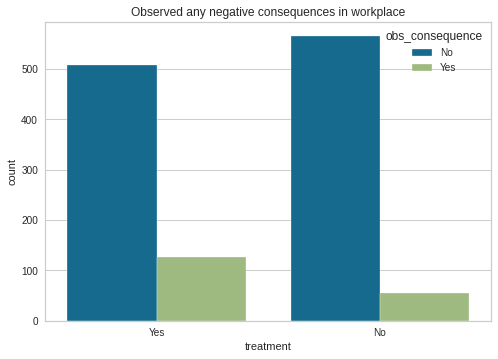

In [48]:
#Observed any negative consequences of mental health conditions?
print(df.obs_consequence.value_counts())
sns.countplot(x='treatment', hue = 'obs_consequence', data = df).set_title('Observed any negative consequences in workplace')

**Getting Data Model-Ready** & **Feature Engineering**

As we saw the distribution of all the features compared with our target variable, at this stage we cannot ignore anymore columns, as they seem important to the target variable. Let's use these features for our model and depending on the feature importance, we can try to drop some less important features to improve the accuracy of the model. 

And as all the features (except Age) are categorical, let's convert these categorical variables to numerical. We could perform this task using the basic method of replacing the categories with the desired numbers, or we could use the scikit-learn's LabelEncoder function to perform the label encoding, but there is a chance that our model may misinterpret the weight of the numerical values and if we use OHE (One Hot Encoding), it may lead to the curse of dimensionality. 

So, let's try to handle the categorical variable using different approaches and compare the results

In [49]:
df.isnull().sum() #As there are a few number of NA values remaining, let's replace them with 'NA' in order to easily handle them in the next steps
df.work_interfere = df.work_interfere.fillna("NA")
df.self_employed = df.self_employed.fillna("NA")

In [50]:
#Approach 1 - Basic
toReplace = {
    'Gender' :{'Female': 0, 'Male': 1, 'Other': 2}, 
    'self_employed' :{'No': 0, 'Yes': 1, 'NA': 2}, 
    'family_history' :{'No': 0, 'Yes': 1},
    'treatment' :{'No': 0, 'Yes': 1}, 
    'work_interfere' :{'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'NA': 4}, 
    'no_employees' :{'6-25': 1, 'More than 1000': 5, '26-100': 2, '100-500': 3, '1-5': 0, '500-1000': 4}, 
    'remote_work' :{'No': 0, 'Yes': 1},
    'tech_company' :{'No': 0, 'Yes': 1}, 
    'benefits' :{'No': 0, 'Yes': 1, "Don't know": 2}, 
    'care_options' :{'No': 0, 'Yes': 1, 'Not sure': 2}, 
    'wellness_program' :{'No': 0, 'Yes': 1, "Don't know": 2},
    'seek_help' :{'No': 0, 'Yes': 1, "Don't know": 2}, 
    'anonymity' :{'No': 0, 'Yes': 1, "Don't know": 2}, 
    'leave' :{'Somewhat easy':2, "Don't know":0, 'Somewhat difficult':3,'Very difficult':4, 'Very easy':1}, 
    'mental_health_consequence' :{'No': 0, 'Yes': 1, 'Maybe': 2},
    'phys_health_consequence' :{'No': 0, 'Yes': 1, 'Maybe': 2}, 
    'coworkers' :{'No': 0, 'Yes': 1, 'Some of them': 2}, 
    'supervisor' :{'No': 0, 'Yes': 1, 'Some of them': 2},
    'mental_health_interview' :{'No': 0, 'Yes': 1, 'Maybe': 2}, 
    'phys_health_interview' :{'No': 0, 'Yes': 1, 'Maybe': 2},
    'mental_vs_physical' :{'No': 0, 'Yes': 1, "Don't know": 2}, 
    'obs_consequence' :{'No': 0, 'Yes': 1},
    'Country': {'United States': 0, 'Canada':1, 'United Kingdom':2, 'Bulgaria':3, 'France':4,'Portugal':5, 'Netherlands':6, 'Switzerland':7, 'Poland':8, 'Australia':9,'Germany':10, 'Russia':11, 'Mexico':12, 'Brazil':13, 'Slovenia':14, 'Costa Rica':15,'Austria':16, 'Ireland':17, 'India':18, 'South Africa':19, 'Italy':20, 'Sweden':21,'Colombia':22, 'Latvia':23, 'Romania':24, 'Belgium':25, 'New Zealand':26, 'Spain':27,'Finland':28, 'Uruguay':29, 'Israel':30, 'Bosnia and Herzegovina':31,'Hungary':32, 'Singapore':33, 'Japan':34, 'Nigeria':35, 'Croatia':36, 'Norway':37,'Thailand':38, 'Denmark':39, 'Bahamas, The':40, 'Greece':41, 'Moldova':42,'Georgia':43, 'China':44, 'Czech Republic':45, 'Philippines':46}
}
df1 = df.replace(toReplace)
df1.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,2,0,1,3,1,0,1,1,2,0,1,1,2,0,0,2,1,0,2,1,0
1,44,1,0,2,0,0,1,5,0,0,2,0,2,2,2,0,2,0,0,0,0,0,2,0
2,32,1,1,2,0,0,1,1,0,1,0,0,0,0,2,3,0,0,1,1,1,1,0,0
3,31,1,2,2,1,1,3,2,0,1,0,1,0,0,0,3,1,1,2,0,2,2,0,1
4,31,1,0,2,0,0,0,3,1,1,1,0,2,2,2,0,0,0,2,1,1,1,2,0


In [51]:
#Approach 2 - Label Encoding
df2 = df.copy()
df2['Gender'] = df2['Gender'].astype('category').cat.codes
df2['self_employed'] = df2['self_employed'].astype('category').cat.codes
df2['family_history'] = df2['family_history'].astype('category').cat.codes
df2['treatment'] = df2['treatment'].astype('category').cat.codes
df2['work_interfere'] = df2['work_interfere'].astype('category').cat.codes
df2['no_employees'] = df2['no_employees'].astype('category').cat.codes
df2['remote_work'] = df2['remote_work'].astype('category').cat.codes
df2['tech_company'] = df2['tech_company'].astype('category').cat.codes
df2['benefits'] = df2['benefits'].astype('category').cat.codes
df2['care_options'] = df2['care_options'].astype('category').cat.codes
df2['wellness_program'] = df2['wellness_program'].astype('category').cat.codes
df2['seek_help'] = df2['seek_help'].astype('category').cat.codes
df2['anonymity'] = df2['anonymity'].astype('category').cat.codes
df2['leave'] = df2['leave'].astype('category').cat.codes
df2['mental_health_consequence'] = df2['mental_health_consequence'].astype('category').cat.codes
df2['phys_health_consequence'] = df2['phys_health_consequence'].astype('category').cat.codes
df2['coworkers'] = df2['coworkers'].astype('category').cat.codes
df2['supervisor'] = df2['supervisor'].astype('category').cat.codes
df2['mental_health_interview'] = df2['mental_health_interview'].astype('category').cat.codes
df2['phys_health_interview'] = df2['phys_health_interview'].astype('category').cat.codes
df2['mental_vs_physical'] = df2['mental_vs_physical'].astype('category').cat.codes
df2['obs_consequence'] = df2['obs_consequence'].astype('category').cat.codes
df2['Country'] = df2['Country'].astype('category').cat.codes
df2.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,45,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44,1,45,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32,1,7,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31,1,44,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31,1,45,0,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [52]:
#Approach 3 - OHE
df3 = df.copy()
df3 = pd.get_dummies(df3,columns = ['Gender', 'Country', 'self_employed', 'family_history',
       'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'])
df3.head()

,Age,treatment,Gender_Female,Gender_Male,Gender_Other,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Czech Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Japan,Country_Latvia,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New Zealand,Country_Nigeria,Country_Norway,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russia,Country_Singapore,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Country_Uruguay,self_employed_NA,self_employed_No,self_employed_Yes,family_history_No,family_history_Yes,work_interfere_NA,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_1-5,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_No,remote_work_Yes,tech_company_No,tech_company_Yes,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_No,obs_consequence_Yes
0,37,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0
1,44,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,32,No,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0
3,31,Yes,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,31,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1254 non-null   int64
 1   Gender                     1254 non-null   int64
 2   Country                    1254 non-null   int64
 3   self_employed              1254 non-null   int64
 4   family_history             1254 non-null   int64
 5   treatment                  1254 non-null   int64
 6   work_interfere             1254 non-null   int64
 7   no_employees               1254 non-null   int64
 8   remote_work                1254 non-null   int64
 9   tech_company               1254 non-null   int64
 10  benefits                   1254 non-null   int64
 11  care_options               1254 non-null   int64
 12  wellness_program           1254 non-null   int64
 13  seek_help                  1254 non-null   int64
 14  anonymity               

Let's use the pycaret library to check the performance of different models on our data and then select the best performing model adn the corresponding dataframe and work on that data to have the most accurate model

In [54]:
#Approach1
classification_setup1 = classification.setup(data= df1, target='treatment')
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8301,0.0000,0.9277,0.7786,0.8463,0.6594,0.6733,0.015
lda,Linear Discriminant Analysis,0.8301,0.8921,0.9277,0.7786,0.8463,0.6594,0.6733,0.024
lr,Logistic Regression,0.8289,0.8939,0.8825,0.8010,0.8385,0.6574,0.6634,0.398
rf,Random Forest Classifier,0.8210,0.8812,0.8781,0.7908,0.8317,0.6415,0.6467,0.512
et,Extra Trees Classifier,0.8142,0.8828,0.8668,0.7876,0.8244,0.6278,0.6328,0.509
ada,Ada Boost Classifier,0.8095,0.8801,0.8531,0.7877,0.8185,0.6186,0.6219,0.129
gbc,Gradient Boosting Classifier,0.8038,0.8815,0.8578,0.7773,0.8152,0.6072,0.6114,0.189
lightgbm,Light Gradient Boosting Machine,0.7914,0.8755,0.8171,0.7805,0.7981,0.5824,0.5835,0.102
nb,Naive Bayes,0.7789,0.8723,0.7770,0.7836,0.7782,0.5579,0.5607,0.017
dt,Decision Tree Classifier,0.7435,0.7435,0.7451,0.7468,0.7444,0.4870,0.4889,0.020


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=4711,
                solver='auto', tol=0.001)

In [55]:
#Approach2
classification_setup2 = classification.setup(data= df2, target='treatment')
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8369,0.9042,0.8844,0.8154,0.8462,0.6738,0.6805,0.519
ada,Ada Boost Classifier,0.8313,0.8964,0.8959,0.7988,0.8429,0.6624,0.6707,0.113
lightgbm,Light Gradient Boosting Machine,0.8290,0.8928,0.8663,0.8141,0.8368,0.6579,0.6640,0.059
gbc,Gradient Boosting Classifier,0.8289,0.8928,0.8798,0.8043,0.8385,0.6578,0.6646,0.139
ridge,Ridge Classifier,0.8198,0.0000,0.8709,0.7963,0.8299,0.6396,0.6461,0.014
lr,Logistic Regression,0.8164,0.8766,0.8551,0.8008,0.8245,0.6329,0.6386,0.088
lda,Linear Discriminant Analysis,0.8164,0.8757,0.8664,0.7937,0.8265,0.6328,0.6390,0.018
et,Extra Trees Classifier,0.8141,0.8975,0.8482,0.8000,0.8209,0.6282,0.6338,0.463
nb,Naive Bayes,0.8005,0.8773,0.8074,0.8048,0.8026,0.6012,0.6068,0.016
qda,Quadratic Discriminant Analysis,0.7948,0.8651,0.8074,0.7951,0.7984,0.5896,0.5939,0.016


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2161, verbose=0,
                       warm_start=False)

In [56]:
#Approach3
classification_setup3 = classification.setup(data= df3, target='treatment')
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8347,0.0000,0.9232,0.7943,0.8527,0.6666,0.6799,0.018
lda,Linear Discriminant Analysis,0.8313,0.8930,0.9188,0.7918,0.8494,0.6597,0.6726,0.034
rf,Random Forest Classifier,0.8290,0.8916,0.8992,0.8000,0.8453,0.6556,0.6645,0.518
et,Extra Trees Classifier,0.8267,0.8917,0.8926,0.7997,0.8424,0.6511,0.6588,0.513
gbc,Gradient Boosting Classifier,0.8257,0.8930,0.8905,0.7995,0.8415,0.6490,0.6561,0.219
lr,Logistic Regression,0.8256,0.8921,0.8795,0.8054,0.8395,0.6492,0.6551,0.149
ada,Ada Boost Classifier,0.8108,0.8780,0.8686,0.7901,0.8262,0.6195,0.6256,0.138
lightgbm,Light Gradient Boosting Machine,0.8097,0.8785,0.8510,0.7986,0.8225,0.6176,0.6221,0.069
dt,Decision Tree Classifier,0.7310,0.7317,0.7128,0.7568,0.7334,0.4623,0.4641,0.022
svm,SVM - Linear Kernel,0.7047,0.0000,0.7472,0.7822,0.7010,0.4069,0.4722,0.029


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3774,
                solver='auto', tol=0.001)

From these comparisons we can see that the datasets created using the three approaches have almost similar initial results (we will work on the models in the next steps). Let's consider results from Approaches 2 and 3, if we see the Time in seconds the one hot encoded dataset takes almost 4.4 times more time compared to the approach 2 (Label encoding) - This is because of the extra (dummy) columns that have been generated.  So let's continue our analysis with the Label Encoded dataset (df2) for our further analysis 

In [57]:
#Let's sed the seed for consistent results

In [58]:
classification.set_config('seed', 99)

In [59]:
finalDF = df2.copy()
finalDF.head() #We will be using this dataset for further analysis

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,45,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,44,1,45,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,32,1,7,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,31,1,44,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,31,1,45,0,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0


In [61]:
# This will take a long time to execute, just to check the distribution plots for all the columns w.r.t each other
#sns.pairplot(finalDF, hue='treatment')

Output hidden; open in https://colab.research.google.com to view.

In [62]:
#Let's split our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(finalDF.drop('treatment',axis=1), finalDF['treatment'], test_size = 0.25, random_state = 99)

#pycaret Approach

In [64]:
classification_setup = classification.setup(data= finalDF, target='treatment')
classification.compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8141,0.8736,0.8926,0.7733,0.8277,0.6283,0.6379,0.120
rf,Random Forest Classifier,0.8038,0.8758,0.8652,0.7728,0.8155,0.6079,0.6137,0.516
et,Extra Trees Classifier,0.8028,0.8764,0.8403,0.7834,0.8101,0.6057,0.6083,0.471
lda,Linear Discriminant Analysis,0.7982,0.8611,0.8493,0.7710,0.8075,0.5965,0.6011,0.019
ridge,Ridge Classifier,0.7970,0.0000,0.8470,0.7704,0.8062,0.5942,0.5985,0.014
gbc,Gradient Boosting Classifier,0.7959,0.8815,0.8743,0.7581,0.8111,0.5920,0.6009,0.140
lightgbm,Light Gradient Boosting Machine,0.7936,0.8682,0.8469,0.7670,0.8038,0.5873,0.5924,0.091
lr,Logistic Regression,0.7868,0.8613,0.8173,0.7705,0.7922,0.5737,0.5765,0.346
nb,Naive Bayes,0.7845,0.8612,0.7786,0.7878,0.7821,0.5692,0.5707,0.016
qda,Quadratic Discriminant Analysis,0.7766,0.8584,0.7924,0.7692,0.7797,0.5533,0.5549,0.017


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=5716)

In [66]:
#Let's create the top 4 models from the comparison
#ADA BOOST
ada = classification.create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8295,0.8869,0.9318,0.7736,0.8454,0.6591,0.6733
1,0.8750,0.8951,0.9545,0.8235,0.8842,0.7500,0.7597
2,0.8409,0.9122,0.8409,0.8409,0.8409,0.6818,0.6818
3,0.7841,0.8920,0.8636,0.7451,0.8000,0.5682,0.5755
4,0.7727,0.8502,0.9318,0.7069,0.8039,0.5455,0.5754
5,0.8068,0.8254,0.8636,0.7755,0.8172,0.6136,0.6176
6,0.8295,0.9034,0.9091,0.7843,0.8421,0.6591,0.6676
7,0.8391,0.8800,0.8864,0.8125,0.8478,0.6778,0.6807
8,0.8391,0.9049,0.9302,0.7843,0.8511,0.6788,0.6905
9,0.7241,0.7859,0.8140,0.6863,0.7447,0.4494,0.4571


In [67]:
#Random Forest
rf = classification.create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.8964,0.9091,0.7692,0.8333,0.6364,0.6472
1,0.8636,0.8698,0.9091,0.8333,0.8696,0.7273,0.7303
2,0.8182,0.9112,0.8409,0.8043,0.8222,0.6364,0.6370
3,0.8068,0.8923,0.8636,0.7755,0.8172,0.6136,0.6176
4,0.7727,0.8592,0.8864,0.7222,0.7959,0.5455,0.5601
5,0.7614,0.8580,0.8182,0.7347,0.7742,0.5227,0.5261
6,0.8295,0.9143,0.8636,0.8085,0.8352,0.6591,0.6606
7,0.8621,0.9054,0.8636,0.8636,0.8636,0.7241,0.7241
8,0.8276,0.8819,0.9302,0.7692,0.8421,0.6559,0.6704
9,0.6782,0.7698,0.7674,0.6471,0.7021,0.3576,0.3638


In [68]:
#Extra Trees Classifier
et = classification.create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.9135,0.8636,0.7917,0.8261,0.6364,0.6390
1,0.8750,0.8843,0.9091,0.8511,0.8791,0.7500,0.7517
2,0.7841,0.8789,0.7955,0.7778,0.7865,0.5682,0.5683
3,0.7955,0.8910,0.8409,0.7708,0.8043,0.5909,0.5934
4,0.7386,0.8652,0.7955,0.7143,0.7527,0.4773,0.4804
5,0.7614,0.8427,0.7727,0.7556,0.7640,0.5227,0.5229
6,0.8295,0.9093,0.8182,0.8372,0.8276,0.6591,0.6593
7,0.8736,0.9268,0.8864,0.8667,0.8764,0.7470,0.7472
8,0.8391,0.8903,0.9070,0.7959,0.8478,0.6786,0.6852
9,0.7126,0.7622,0.8140,0.6731,0.7368,0.4266,0.4360


In [69]:
#Linear Discriminant Analysis - LDA
lda = classification.create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7841,0.8631,0.8182,0.7660,0.7912,0.5682,0.5695
1,0.8295,0.8900,0.9091,0.7843,0.8421,0.6591,0.6676
2,0.8182,0.8972,0.8409,0.8043,0.8222,0.6364,0.6370
3,0.7955,0.8440,0.8864,0.7500,0.8125,0.5909,0.6009
4,0.7614,0.8342,0.7955,0.7447,0.7692,0.5227,0.5239
5,0.7273,0.8006,0.7273,0.7273,0.7273,0.4545,0.4545
6,0.8523,0.9261,0.9318,0.8039,0.8632,0.7045,0.7136
7,0.8736,0.9234,0.8864,0.8667,0.8764,0.7470,0.7472
8,0.8046,0.8906,0.8605,0.7708,0.8132,0.6097,0.6137
9,0.7356,0.7415,0.8372,0.6923,0.7579,0.4724,0.4828


In [74]:
#Let's try to tune these models using the inbuilt function of pycaret
ada_tuned = classification.tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8409,0.9163,0.9773,0.7679,0.8600,0.6818,0.7087
1,0.8523,0.9130,0.9545,0.7925,0.8660,0.7045,0.7198
2,0.8523,0.8980,0.9545,0.7925,0.8660,0.7045,0.7198
3,0.8295,0.8846,0.9773,0.7544,0.8515,0.6591,0.6899
4,0.7614,0.8179,0.9545,0.6885,0.8000,0.5227,0.5667
5,0.7841,0.8574,0.9091,0.7273,0.8081,0.5682,0.5868
6,0.8864,0.9003,1.0000,0.8148,0.8980,0.7727,0.7935
7,0.8621,0.9387,0.9318,0.8200,0.8723,0.7237,0.7307
8,0.8506,0.8998,0.9767,0.7778,0.8660,0.7020,0.7254
9,0.7356,0.7680,0.8837,0.6786,0.7677,0.4730,0.4955


In [75]:
rf_tuned = classification.tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8409,0.8951,0.9773,0.7679,0.8600,0.6818,0.7087
1,0.8523,0.9096,0.9545,0.7925,0.8660,0.7045,0.7198
2,0.8523,0.9122,0.9545,0.7925,0.8660,0.7045,0.7198
3,0.8295,0.8820,0.9773,0.7544,0.8515,0.6591,0.6899
4,0.7614,0.8848,0.9545,0.6885,0.8000,0.5227,0.5667
5,0.7841,0.8417,0.9091,0.7273,0.8081,0.5682,0.5868
6,0.8864,0.9202,1.0000,0.8148,0.8980,0.7727,0.7935
7,0.8621,0.9316,0.9318,0.8200,0.8723,0.7237,0.7307
8,0.8506,0.9022,0.9767,0.7778,0.8660,0.7020,0.7254
9,0.7356,0.7881,0.8837,0.6786,0.7677,0.4730,0.4955


In [76]:
et_tuned = classification.tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8409,0.9349,0.9773,0.7679,0.8600,0.6818,0.7087
1,0.8523,0.9112,0.9545,0.7925,0.8660,0.7045,0.7198
2,0.8523,0.9073,0.9545,0.7925,0.8660,0.7045,0.7198
3,0.8295,0.8709,0.9773,0.7544,0.8515,0.6591,0.6899
4,0.7614,0.8634,0.9545,0.6885,0.8000,0.5227,0.5667
5,0.7841,0.8654,0.9091,0.7273,0.8081,0.5682,0.5868
6,0.8864,0.9052,1.0000,0.8148,0.8980,0.7727,0.7935
7,0.8621,0.9363,0.9318,0.8200,0.8723,0.7237,0.7307
8,0.8506,0.9062,0.9767,0.7778,0.8660,0.7020,0.7254
9,0.7356,0.7770,0.8837,0.6786,0.7677,0.4730,0.4955


In [77]:
lda_tuned = classification.tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7841,0.8626,0.8182,0.7660,0.7912,0.5682,0.5695
1,0.8523,0.8910,0.9318,0.8039,0.8632,0.7045,0.7136
2,0.8182,0.8993,0.8409,0.8043,0.8222,0.6364,0.6370
3,0.7955,0.8419,0.8864,0.7500,0.8125,0.5909,0.6009
4,0.7614,0.8326,0.7955,0.7447,0.7692,0.5227,0.5239
5,0.7273,0.8017,0.7273,0.7273,0.7273,0.4545,0.4545
6,0.8523,0.9256,0.9318,0.8039,0.8632,0.7045,0.7136
7,0.8736,0.9212,0.8864,0.8667,0.8764,0.7470,0.7472
8,0.8161,0.8901,0.8837,0.7755,0.8261,0.6327,0.6388
9,0.7241,0.7400,0.8140,0.6863,0.7447,0.4494,0.4571


In [78]:
#Let's try to build a ensemble (using blend) of the above 4 models before going into building models using scikit-learn
blender = classification.blend_models(estimator_list=[ada, rf, et, lda])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.8941,0.9318,0.7593,0.8367,0.6364,0.6535
1,0.8636,0.8817,0.9091,0.8333,0.8696,0.7273,0.7303
2,0.8295,0.9013,0.8864,0.7959,0.8387,0.6591,0.6634
3,0.8182,0.8812,0.9091,0.7692,0.8333,0.6364,0.6472
4,0.7727,0.8621,0.8636,0.7308,0.7917,0.5455,0.5547
5,0.7841,0.8316,0.8409,0.7551,0.7957,0.5682,0.5719
6,0.8523,0.9267,0.9091,0.8163,0.8602,0.7045,0.7091
7,0.8736,0.9255,0.8864,0.8667,0.8764,0.7470,0.7472
8,0.8391,0.8922,0.9302,0.7843,0.8511,0.6788,0.6905
9,0.7011,0.7748,0.8140,0.6604,0.7292,0.4038,0.4148


In [80]:
blender_tuned = classification.blend_models(estimator_list=[ada_tuned, rf_tuned, et_tuned, lda_tuned])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8409,0.8889,0.9773,0.7679,0.8600,0.6818,0.7087
1,0.8523,0.9143,0.9545,0.7925,0.8660,0.7045,0.7198
2,0.8523,0.9086,0.9545,0.7925,0.8660,0.7045,0.7198
3,0.8295,0.8678,0.9773,0.7544,0.8515,0.6591,0.6899
4,0.7614,0.8585,0.9545,0.6885,0.8000,0.5227,0.5667
5,0.7841,0.8321,0.9091,0.7273,0.8081,0.5682,0.5868
6,0.8864,0.9189,1.0000,0.8148,0.8980,0.7727,0.7935
7,0.8621,0.9424,0.9318,0.8200,0.8723,0.7237,0.7307
8,0.8506,0.9001,0.9767,0.7778,0.8660,0.7020,0.7254
9,0.7356,0.7785,0.8837,0.6786,0.7677,0.4730,0.4955


In [81]:
#Let's evaluate the ensemble model blender_tuned
classification.evaluate_model(blender_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In the above dynamic plot, we can see various types of plots (for ex, Hyperparameters, AUC, Confusion Matrix, Precision-Recall, Learning Curve, Feature Importance etc.)

We can gain some useful insights, check the feature importance and try to build our own models using sklearn considering only the important features to build the perfect model.

Now, Instead of using the pycaret library which builds the models automatically as seen above, let's use sklearn to build and train some basic models on our data

In [82]:
#Define a function to print the results of the models
def printModelResults(y_test,y_pred,modelName):
  print('____________________________________________________________________')
  print('The classification report for the %s model is:' %modelName)
  print(classification_report(y_test,y_pred))
  print('The confusion matrix is:')
  print(pd.DataFrame(confusion_matrix(y_test,y_pred)))
  ns_probs = [0 for _ in range(len(y_test))]
  lr_probs = y_pred
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('%s: ROC AUC=%.3f' %(modelName, lr_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label=modelName)
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()
  print('____________________________________________________________________')

Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

____________________________________________________________________
The classification report for the Logistic Regression model is:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       146
           1       0.75      0.78      0.77       168

    accuracy                           0.75       314
   macro avg       0.74      0.74      0.74       314
weighted avg       0.74      0.75      0.74       314

The confusion matrix is:
     0    1
0  103   43
1   37  131
No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.743


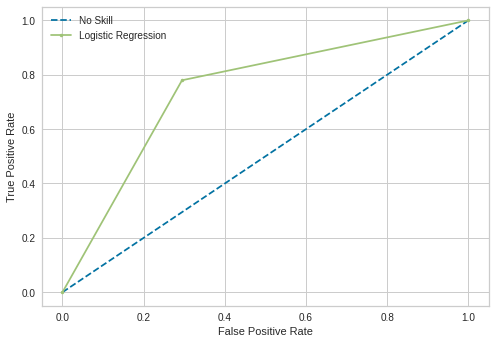

____________________________________________________________________


In [84]:
lr_pred = lr.predict(X_test)
printModelResults(y_test,lr_pred,'Logistic Regression')

Decision Trees

____________________________________________________________________
The classification report for the Decision Tree Classifier model is:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       146
           1       0.76      0.74      0.75       168

    accuracy                           0.74       314
   macro avg       0.73      0.74      0.73       314
weighted avg       0.74      0.74      0.74       314

The confusion matrix is:
     0    1
0  106   40
1   43  125
No Skill: ROC AUC=0.500
Decision Tree Classifier: ROC AUC=0.735


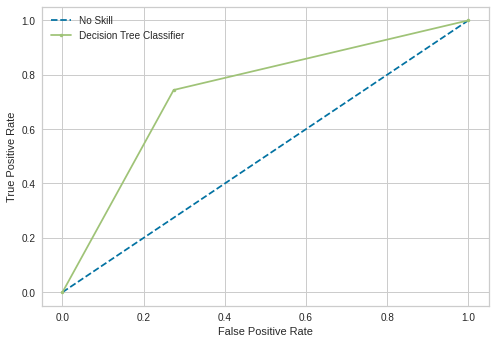

____________________________________________________________________


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
printModelResults(y_test,dt_pred,'Decision Tree Classifier')

In [86]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

Click on the image to zoom in!

Random Forest

____________________________________________________________________
The classification report for the Random Forest Classifier model is:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       146
           1       0.75      0.83      0.79       168

    accuracy                           0.76       314
   macro avg       0.76      0.75      0.75       314
weighted avg       0.76      0.76      0.76       314

The confusion matrix is:
    0    1
0  99   47
1  29  139
No Skill: ROC AUC=0.500
Random Forest Classifier: ROC AUC=0.753


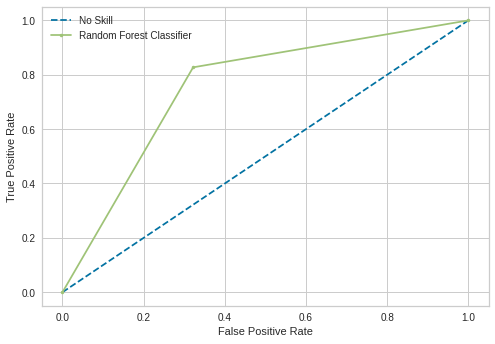

____________________________________________________________________


In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
printModelResults(y_test,rfc_pred,'Random Forest Classifier')

Support Vector Classifier

____________________________________________________________________
The classification report for the Support Vector Classifier model is:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       146
           1       0.75      0.81      0.78       168

    accuracy                           0.75       314
   macro avg       0.75      0.75      0.75       314
weighted avg       0.75      0.75      0.75       314

The confusion matrix is:
     0    1
0  100   46
1   32  136
No Skill: ROC AUC=0.500
Support Vector Classifier: ROC AUC=0.747


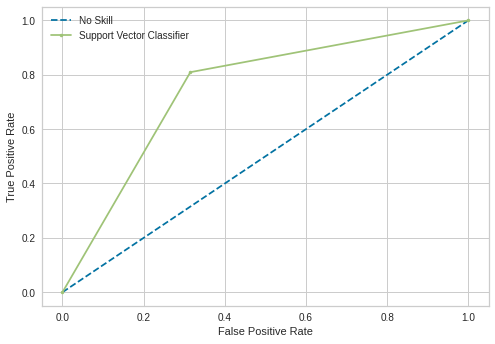

____________________________________________________________________


In [88]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
printModelResults(y_test,svc_pred,'Support Vector Classifier')

Gradient Boosting Classifier

____________________________________________________________________
The classification report for the Gradient Boosting Classifier model is:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       146
           1       0.76      0.85      0.80       168

    accuracy                           0.77       314
   macro avg       0.78      0.77      0.77       314
weighted avg       0.78      0.77      0.77       314

The confusion matrix is:
     0    1
0  101   45
1   26  142
No Skill: ROC AUC=0.500
Gradient Boosting Classifier: ROC AUC=0.769


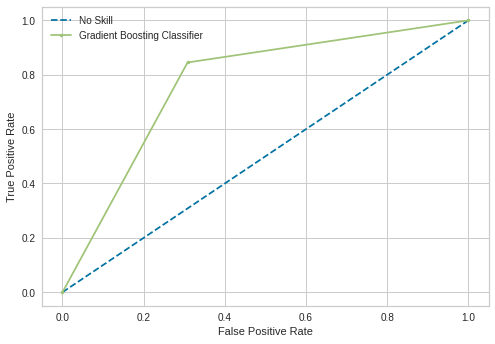

____________________________________________________________________


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
printModelResults(y_test,gbc_pred,'Gradient Boosting Classifier')

ADA Boost

____________________________________________________________________
The classification report for the ADA Boost Classifier model is:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       146
           1       0.76      0.83      0.80       168

    accuracy                           0.77       314
   macro avg       0.77      0.77      0.77       314
weighted avg       0.77      0.77      0.77       314

The confusion matrix is:
     0    1
0  102   44
1   28  140
No Skill: ROC AUC=0.500
ADA Boost Classifier: ROC AUC=0.766


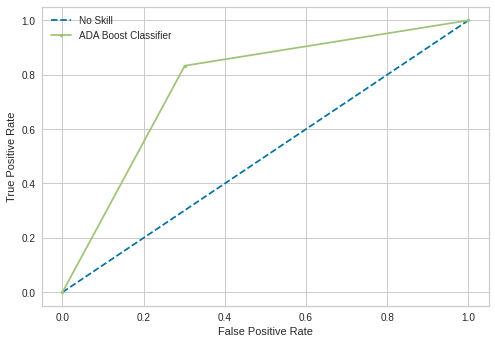

____________________________________________________________________


In [90]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
printModelResults(y_test,ada_pred,'ADA Boost Classifier')

XGBoost

____________________________________________________________________
The classification report for the XGBoost Classifier model is:
              precision    recall  f1-score   support

           0       0.79      0.68      0.74       146
           1       0.76      0.85      0.80       168

    accuracy                           0.77       314
   macro avg       0.77      0.77      0.77       314
weighted avg       0.77      0.77      0.77       314

The confusion matrix is:
     0    1
0  100   46
1   26  142
No Skill: ROC AUC=0.500
XGBoost Classifier: ROC AUC=0.765


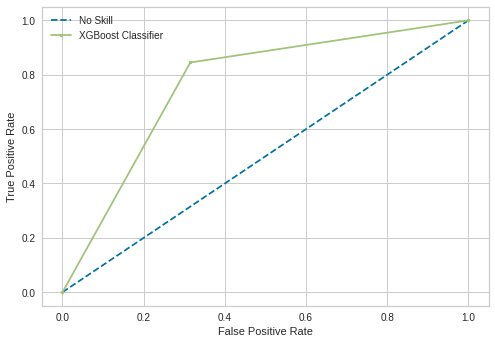

____________________________________________________________________


In [91]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
printModelResults(y_test,xgb_pred,'XGBoost Classifier')

Neural Networks

Let's try a couple of basic Neural Network architectures and compare the results

In [99]:
y = finalDF['treatment']
X = finalDF.drop('treatment', axis=1)

In [100]:
# NN 1 - sigmoid with 1 hidden layer
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model1 = Sequential()
model1.add(Dense(30, input_dim=23, activation='relu'))
model1.add(Dense(15, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model1.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
126/126 [==============================] - 1s 2ms/step - loss: 0.6480 - accuracy: 0.6396
Epoch 2/150
126/126 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7400
Epoch 3/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4876 - accuracy: 0.7743
Epoch 4/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7831
Epoch 5/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.7807
Epoch 6/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7895
Epoch 7/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8014
Epoch 8/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.7967
Epoch 9/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8022
Epoch 10/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4394 - accura

In [101]:
# NN 2 - sigmoid with 1 hidden layer
model = Sequential()
model.add(Dense(23, input_dim=23, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
126/126 [==============================] - 1s 2ms/step - loss: 0.8474 - accuracy: 0.5518
Epoch 2/150
126/126 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7648
Epoch 3/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7959
Epoch 4/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7998
Epoch 5/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7943
Epoch 6/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7974
Epoch 7/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7911
Epoch 8/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.7943
Epoch 9/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8038
Epoch 10/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4418 - accura

In [102]:
# NN 3 - sigmoid with 2 hidden layers
model = Sequential()
model.add(Dense(30, input_dim=23, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
126/126 [==============================] - 1s 2ms/step - loss: 0.7836 - accuracy: 0.5949
Epoch 2/150
126/126 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.7297
Epoch 3/150
126/126 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 0.7616
Epoch 4/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7703
Epoch 5/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.7998
Epoch 6/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.7990
Epoch 7/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4568 - accuracy: 0.8006
Epoch 8/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7847
Epoch 9/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7967
Epoch 10/150
126/126 [==============================] - 0s 2ms/step - loss: 0.4310 - accura

In [103]:
# NN 4 - Softmax instead of sigmoid
model = Sequential()
model.add(Dense(30, input_dim=23, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
94/94 [==============================] - 1s 2ms/step - loss: 0.6787 - accuracy: 0.4947
Epoch 2/150
94/94 [==============================] - 0s 2ms/step - loss: 0.5701 - accuracy: 0.4947
Epoch 3/150
94/94 [==============================] - 0s 2ms/step - loss: 0.4865 - accuracy: 0.4947
Epoch 4/150
94/94 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.4947
Epoch 5/150
94/94 [==============================] - 0s 2ms/step - loss: 0.4237 - accuracy: 0.4947
Epoch 6/150
94/94 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.4947
Epoch 7/150
94/94 [==============================] - 0s 2ms/step - loss: 0.4279 - accuracy: 0.4947
Epoch 8/150
94/94 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.4947
Epoch 9/150
94/94 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.4947
Epoch 10/150
94/94 [==============================] - 0s 2ms/step - loss: 0.3952 - accuracy: 0.4947
Epoch 11/

Let's create a DF with the accuracy (although we should consider other metrics such as ROC-AUC, Precision, Recall and F1 score for a classification problem, let's consider accuracy for now) for basic understanding of the performance of all the models

In [104]:
algList = ['pycaret - ADA Boost Classifier','pycaret - ADA Boost Classifier Tuned','pycaret - Random Forest','pycaret - Random Forest Tuned','pycaret - Extra Trees Classifier','pycaret - Extra Trees Classifier Tuned','pycaret - Linear Discriminant Analysis','pycaret - Linear Discriminant Analysis Tuned','pycaret - Ensember (ADA; RF; ET; LDA)','pycaret - Ensember (ADA; RF; ET; LDA) Tuned','sklearn - Logistic Regression','sklearn - Decision Trees','sklearn - Random Forest','sklearn - Support Vector Classifier','sklearn - Gradient Boosting Classifier','sklearn - ADA Boost','sklearn - XGBoost','Keras - Neural Networks - Sigmoid with 1 hidden layer','Keras - Neural Networks - Sigmoid with 1 hidden layer','Keras - Neural Networks - Sigmoid with 2 hidden layers','Keras - Neural Networks - Softmax with 1 hidden layer']
AccList = [0.8141,0.8255,0.8038,0.8255,0.8028,0.8255,0.7982,0.8005,0.8152,0.8255,0.743,0.735,0.753,0.747,0.769,0.766,0.765,0.8955,0.882,0.8971,0.5048]
ResultDF = pd.DataFrame({'Algorithm': algList, 'Accuracy': AccList})

In [110]:
ResultDF.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy
19,Keras - Neural Networks - Sigmoid with 2 hidde...,0.8971
17,Keras - Neural Networks - Sigmoid with 1 hidde...,0.8955
18,Keras - Neural Networks - Sigmoid with 1 hidde...,0.8820
5,pycaret - Extra Trees Classifier Tuned,0.8255
1,pycaret - ADA Boost Classifier Tuned,0.8255
9,pycaret - Ensember (ADA; RF; ET; LDA) Tuned,0.8255
3,pycaret - Random Forest Tuned,0.8255
8,pycaret - Ensember (ADA; RF; ET; LDA),0.8152
0,pycaret - ADA Boost Classifier,0.8141
2,pycaret - Random Forest,0.8038


Finally we can see that Neural Networks with a Sigmoid activation and 2 hidden layers performed better compared  to the other models and provided an accuracy of 89.71%. 

We could further improve all these models by:
- modifying the hyperparameters, 
- selecting the most important features (for each model) and retraining the models

By checking the feature importance plot in the line 81,  we can see the most important features that impact a persons decision to sought treatment for a medical condition. 

By considering the timestamps (which we dropped in the beginning), if we had survey's over a longer period, we could also analyze how people's attitude towards mental health changed over time. 

Again, if we had the more geographical data (maybe latitude and longitude, instead of the NA values in the state column for all the data except US) we could use geopandas, geoplot and shapefiles to plot these geospatial data and get some useful insights about how people's attitude changes by their geographical location.